In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=pd.read_csv("data.csv")

In [72]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [73]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [74]:
df=df.drop(columns=['id','Unnamed: 32'],errors='ignore')
df['diagnosis']=LabelEncoder().fit_transform(df['diagnosis'])

In [75]:

from sklearn.model_selection import train_test_split

In [76]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [79]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [80]:
y_pred = model.predict(X_test)

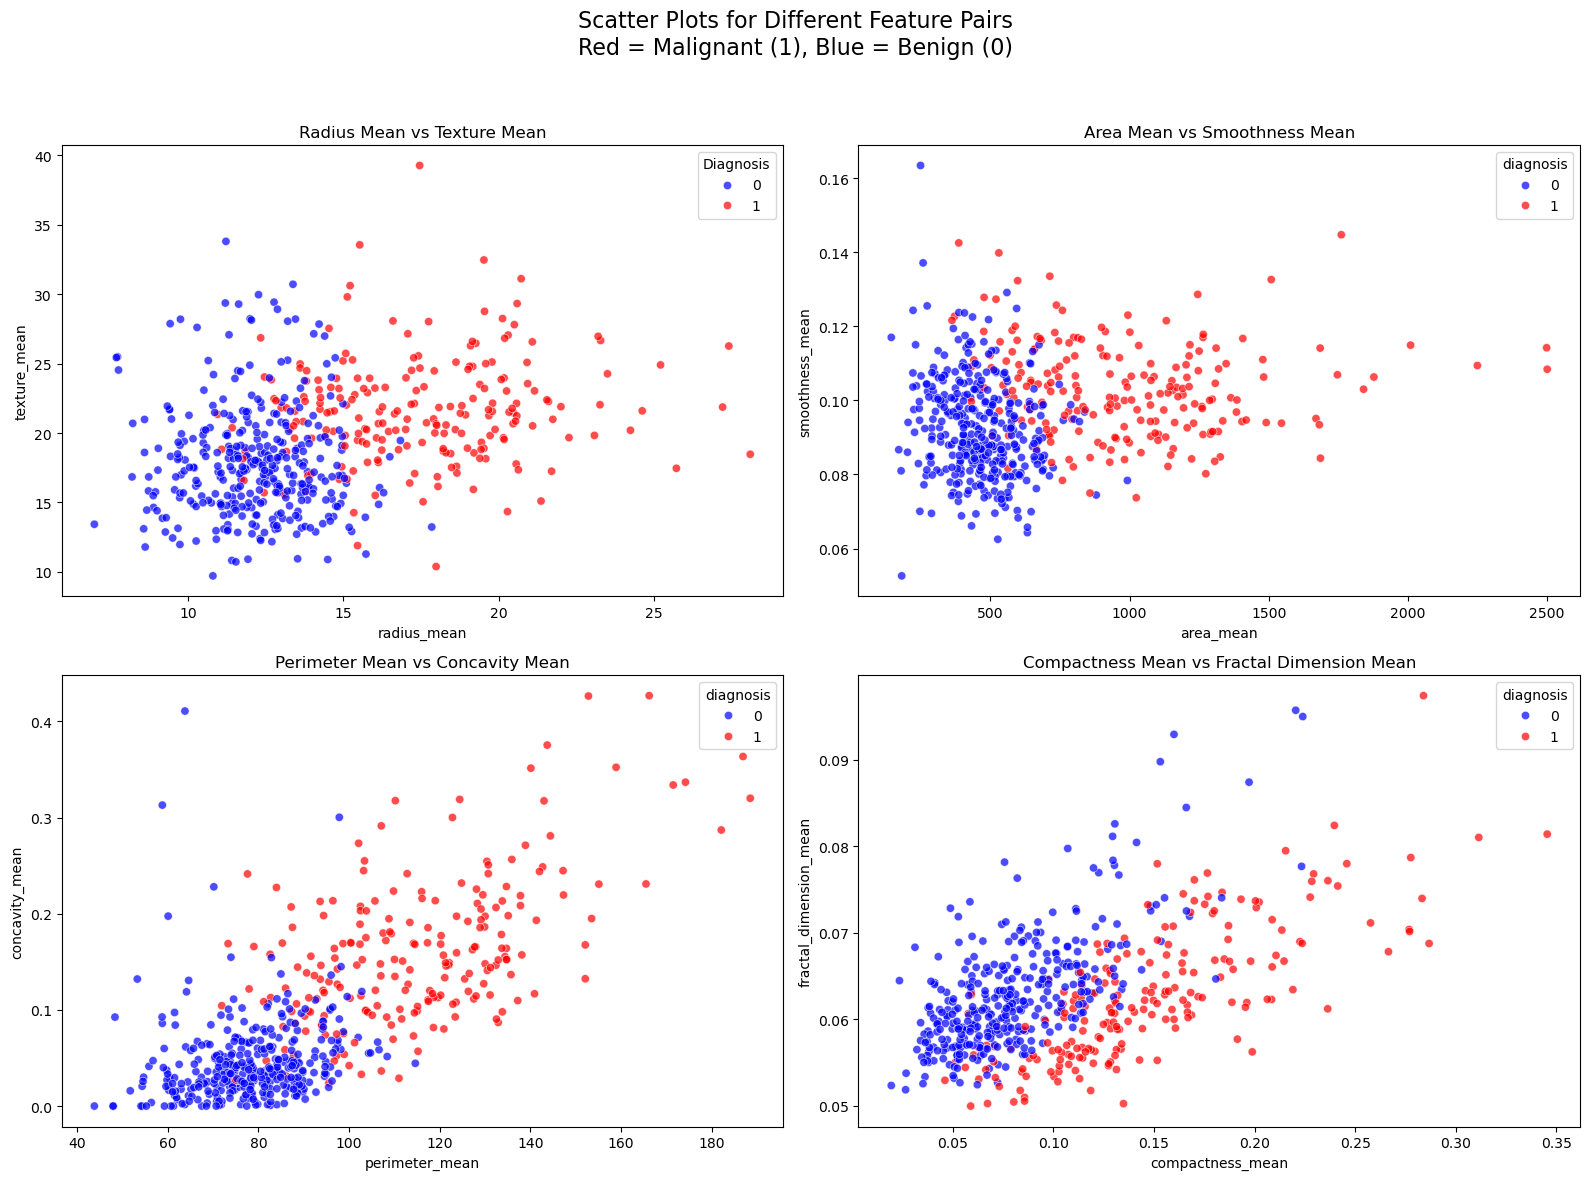

In [81]:
plt.figure(figsize=(16, 12))
plt.suptitle('Scatter Plots for Different Feature Pairs\nRed = Malignant (1), Blue = Benign (0)', fontsize=16)

color_map = {0: 'blue', 1: 'red'}

# radius_mean vs texture_mean
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis', palette=color_map, alpha=0.7)
plt.title('Radius Mean vs Texture Mean')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend(title='Diagnosis')

# area_mean vs smoothness_mean
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='area_mean', y='smoothness_mean', hue='diagnosis', palette=color_map, alpha=0.7)
plt.title('Area Mean vs Smoothness Mean')
plt.xlabel('area_mean')
plt.ylabel('smoothness_mean')

# perimeter_mean vs concavity_mean
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='perimeter_mean', y='concavity_mean', hue='diagnosis', palette=color_map, alpha=0.7)
plt.title('Perimeter Mean vs Concavity Mean')
plt.xlabel('perimeter_mean')
plt.ylabel('concavity_mean')

# compactness_mean vs fractal_dimension_mean
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='compactness_mean', y='fractal_dimension_mean', hue='diagnosis', palette=color_map, alpha=0.7)
plt.title('Compactness Mean vs Fractal Dimension Mean')
plt.xlabel('compactness_mean')
plt.ylabel('fractal_dimension_mean')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [83]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



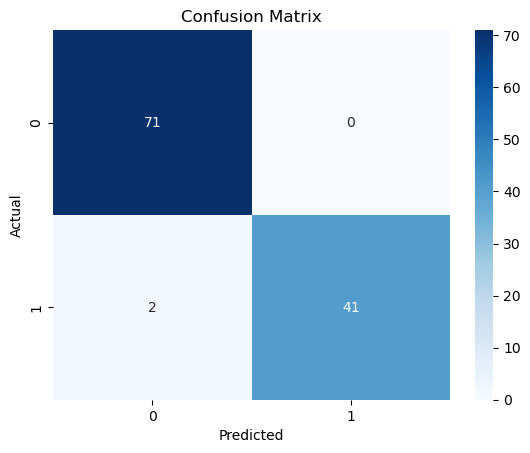

In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()